# 

# After MCMC: diagnostics, model evaluation and other decisions

## Diagnostics

The most important thing to do after running any Bayesian computation is
to verify that the result of the computation is really a sample from the
target posterior distribution. For this we rely on **diagnostics**. Here
we will look at two important diagnostics: $\hat{R}$ and divergent
transitions.

### $\hat{R}$

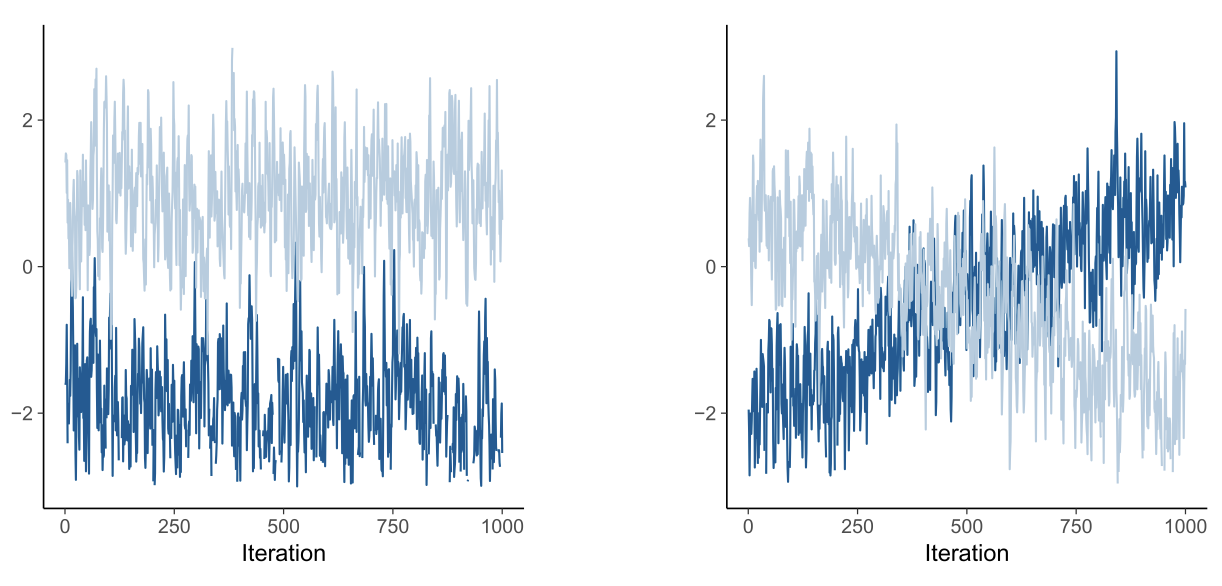

$\hat{R}$ is a number that tells you:

-   Do my chains agree with each other?
-   Are my chains stationary?

$\hat{R}$ should be close to 1. If not, you need to change something!

Find out more: Vehtari et al. (2021)

### Divergent transitions

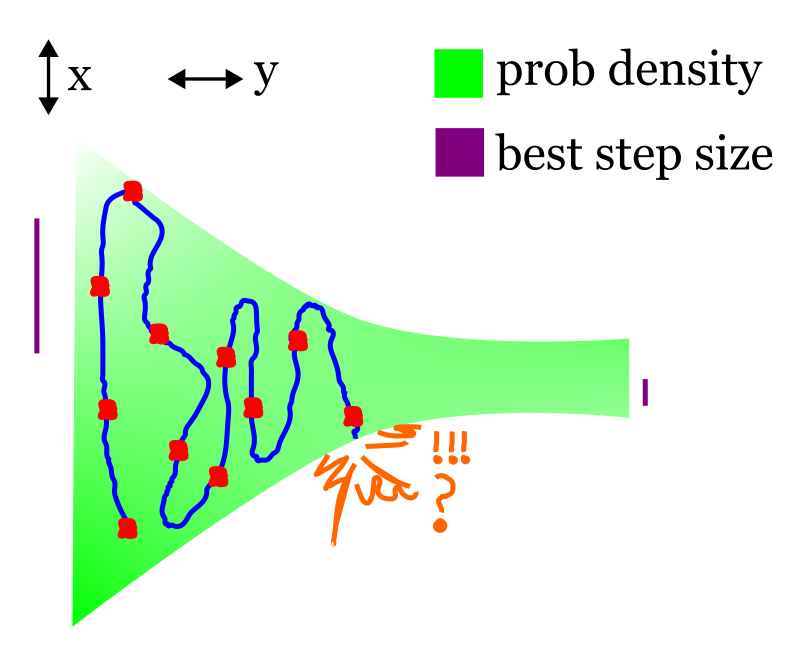

This diagnostic is specific to HMC.

It answers the question *did the trajectory ODE solver fail?*

The reason for the failure is typically that the step size was too big,
resulting in a discretisation error. Luckily for us, the solver that HMC
uses tends to fail catastrophically in this case, leaving us with a
handy diagnostic.

> **Important**
>
> There should be no post-warmup divergent transitions in your sample:
> if there are some, the sample may well not represent the target
> distribution!

Sometimes the location of the divergent transitions gives clues about
the reason for the failure.

To avoid divergent transitions when using the NUTS sampler with Stan’s
warmup algorithm, we can bias the step size smaller by choosing a higher
target acceptance probability than the default (typically 0.8).

Find out more: [Betancourt
(2017)](https://betanalpha.github.io/assets/case_studies/divergences_and_bias.html).

## Model evaluation

Once we are confident that we really have a posterior sample, the most
immediate question is often “how good was the model”. We can answer this
question both quantitatively by constructing numerical metrics and
qualitatively by probing what exactly our model has to say.

### Retrospective ‘predictive’ checks

**Predictive distribution**: what a model that can replicate its
measurements says about those measurements, i.e. $p(y^{rep})$.

It’s very useful to check these things:

-   The prior predictive distribution should not allocate much
    probability mass to replicated measurements that are obviously
    impossible.

-   If any actual measurements lie in a region with low prior predictive
    probability (e.g. if measurement $i$ is too low so that
    $p(y^rep_i>y_i) = 0.99$), that shows that the prior model is
    inconsistent with the measurements.

-   If there are systematic differences between the posterior predictive
    distribution and the observed measurements, that is a sign that the
    model is inconsistent with the measurements.

Since predictive checking depends on pattern-matching it is often a good
idea to use graphs for it.

## Scoring models with loss functions

**Loss function**: If the observation is $y$ and the model says
$p(y) = z$, how bad is that?

To choose a model, choose a loss function, then try to minimise
estimated expected loss.

> **Important**
>
> Which loss function is best depends on the problem!

To estimate expected loss, make some predictions.

> **Important**
>
> In order to be useful for estimating model performance, predictions
> must be relevant to the evaluation context that matters.
>
> i.e. not from the training data, not from an already-observed sample,
> not from the past, etc…

Find out more: Vehtari and Ojanen (2012)

## Log likelihood

A good default loss function:

$$
loss(y, p(y)) = -\ln{p(y)}
$$

Out of sample log likelihood can often be approximated cheaply: see
Vehtari, Gelman, and Gabry (2017).

Find out more: (Landes and Williamson 2013, sec. 2.3)

# Other decisions

## What did my model say??

For this the best method is to use **summary statistics**.

General pattern:

1.  define a number that answers the question definitively for a single
    draw.
2.  aggregate the draws over the posterior sample to get a probabilistic
    answer.

| Statistic | Answers the question |
|---------------------|---------------------------------------------------|
| Mean | “What does the model think is the most likely value” |
| Standard deviation | “How sure is my model about this?” |
| Quantile n | “What is x s.t. my model is n% sure that the quantity is at least x?” |

## Do I have enough samples?

To find out, calculate the [Monte Carlo standard
error](https://mc-stan.org/docs/reference-manual/effective-sample-size.html#estimation-of-mcmc-standard-error).

> **Important**
>
> Monte Carlo standard error can vary for different statistics relating
> to the same quantity

Betancourt, Michael. 2017. “Diagnosing Biased Inference with
Divergences.” *Betanalpha.github.io*.
<https://github.com/betanalpha/knitr_case_studies/tree/master/divergences_and_bias>.

Landes, Jürgen, and Jon Williamson. 2013. “Objective Bayesianism and the
Maximum Entropy Principle.” *Entropy* 15 (12): 3528–91.
<https://doi.org/10.3390/e15093528>.

Vehtari, Aki, Andrew Gelman, and Jonah Gabry. 2017. “Practical Bayesian
Model Evaluation Using Leave-One-Out Cross-Validation and WAIC.”
*Statistics and Computing* 27 (5): 1413–32.
<https://doi.org/10.1007/s11222-016-9696-4>.

Vehtari, Aki, Andrew Gelman, Daniel Simpson, Bob Carpenter, and
Paul-Christian Bürkner. 2021. “Rank-Normalization, Folding, and
Localization: An Improved R^ for Assessing Convergence of MCMC (with
Discussion).” *Bayesian Analysis* 16 (2): 667–718.
<https://doi.org/10.1214/20-BA1221>.

Vehtari, Aki, and Janne Ojanen. 2012. “A Survey of Bayesian Predictive
Methods for Model Assessment, Selection and Comparison.” *Statistics
Surveys* 6 (none): 142–228. <https://doi.org/10.1214/12-SS102>.